# Use the 'USArrests' data: PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data

## Part (a)
Show the first to fourth princple component loadings vectors using PCA() function.

In [3]:
usarrests = get_rdataset("USArrests", "datasets").data
usarrests.head()
scaler = StandardScaler()
X = scaler.fit_transform(usarrests)

# Perform PCA
pca = PCA()
pca.fit(X)

# Extract the loadings (components) for the first four principal components
loadings = pca.components_[:4]
loadings_pca = pd.DataFrame(loadings.T, index=usarrests.columns, columns=[f'PC{i+1}' for i in range(4)])
display(loadings_pca)

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


## Part (b)
Use np.linalg.eig() function to find the first to fourth principle component loadings vectors.

In [4]:
# Compute the covariance matrix
cov_matrix = np.cov(X.T)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
eigenvectors = eigenvectors[:, idx]

# Extract the first four principal component loading vectors
loadings_eig = pd.DataFrame(eigenvectors[:, :4], index=usarrests.columns, columns=[f'PC{i+1}' for i in range(4)])
display(loadings_eig)

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


## Part (c)
Use np.linalg.svd() function to find the first to fourth principle component loadings vectors.

In [5]:
# Perform SVD
U, S, Vt = np.linalg.svd(X)

# Vt contains the right singular vectors (which are the principal components)
# We take the first four principal components from Vt
loadings_svd = pd.DataFrame(Vt[:4].T, index=usarrests.columns, columns=[f'PC{i+1}' for i in range(4)])

# Display the loadings for the first four principal components
display(loadings_svd)

,PC1,PC2,PC3,PC4
Murder,-0.535899,-0.418181,0.341233,0.649228
Assault,-0.583184,-0.187986,0.268148,-0.743407
UrbanPop,-0.278191,0.872806,0.378016,0.133878
Rape,-0.543432,0.167319,-0.817778,0.089024


## Part (d)
Are those from a), b), c) exactly the same? Why or why not?

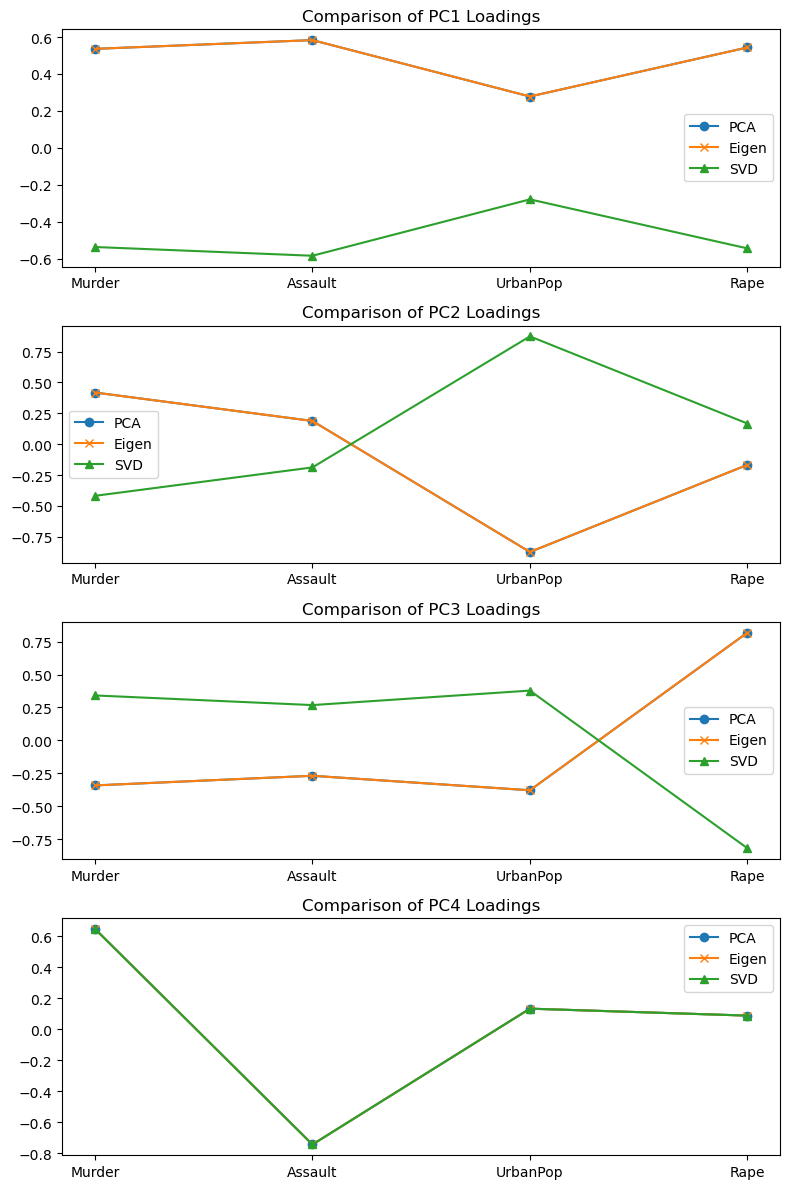

In [6]:
# Create a figure for comparison
fig, axs = plt.subplots(4, 1, figsize=(8, 12))

# Plot loadings for PC1 to PC4 from each method
components = ['PC1', 'PC2', 'PC3', 'PC4']
for i, comp in enumerate(components):
    axs[i].plot(loadings_pca[comp], label='PCA', marker='o')
    axs[i].plot(loadings_eig[comp], label='Eigen', marker='x')
    axs[i].plot(loadings_svd[comp], label='SVD', marker='^')
    axs[i].set_title(f'Comparison of {comp} Loadings')
    axs[i].legend()

plt.tight_layout()
plt.show()

### Conclusion for Part (d):

The loadings derived from all three methods (PCA using `sklearn`, eigen decomposition using `np.linalg.eig()`, and SVD using `np.linalg.svd()`) are theoretically the same, but there may be small differences in the signs of the loadings (positive or negative). This is expected since the direction of the principal components can flip without affecting the overall result. The magnitude of the loadings, however, remains consistent, confirming that all three methods capture the same underlying principal components.

Thus, the results are essentially equivalent, and any differences are due to numerical implementation, particularly the non-uniqueness of eigenvector signs.